# Generating 2D data

In [1]:
import scipy.io
import os
import matplotlib.pyplot as plt
import numpy as np
import h5py

import sys
sys.path.append("..") 
from cryoem.plots import plot_projection, plot_projections
from cryoem.noise import gaussian_noise

In [2]:
!cd ..;python generator.py -conf protein.config

usage: generator.py [-h] --config-file CONFIG_FILE [--input-file INPUT_FILE]
                    [--projections-num PROJECTIONS_NUM]
                    [--angle-shift ANGLE_SHIFT]
                    [--angle-coverage ANGLE_COVERAGE]
                    [--output-file OUTPUT_FILE]
generator.py: error: the following arguments are required: --config-file/-conf


In [13]:
# location of *.h5 files
data_dir = "../generated_data"
projections_filename = "ProjectionsAngles_ProjNber5000_AngCoverage0.5_AngShift1.57.h5"

data_path = os.path.join(data_dir, projections_filename)

In [14]:
# load structures
# data = scipy.io.loadmat(data_path)
data = h5py.File(data_path, 'r')

In [15]:
len(data["Projections"])

5000

In [16]:
len(data["Angles"])

5000

In [17]:
data["Projections"].shape

(5000, 136, 136)

In [18]:
data["Projections"][0].shape

(136, 136)

## Projection and Noise

When tested, functions for plotting and noise generated are put inside the corresponding files called plots.py and noise.py. This way we can use them from different notebooks, and not repeating ourselves.

### One projection without noise

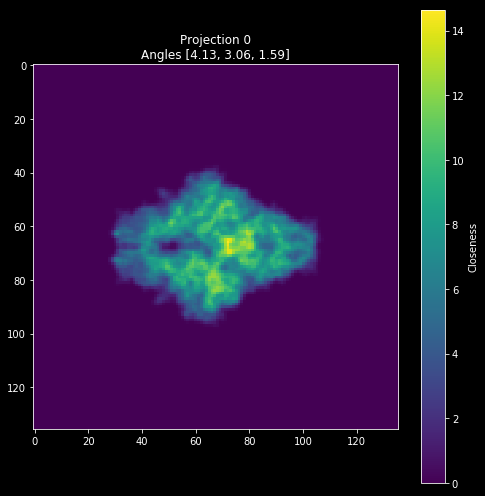

In [19]:
datapoint = 0
image = data["Projections"][datapoint]
angles = [ float(f"{x:.2f}") for x in data["Angles"][datapoint] ]
title = f'Projection {datapoint}\nAngles {angles}'
    
plot_projection(image, title)

### One projection with Gaussian noise

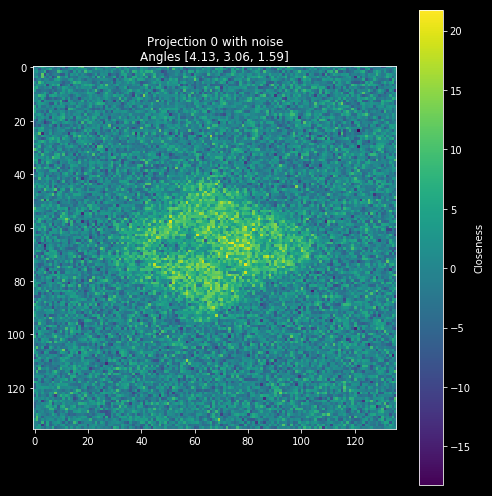

In [22]:
datapoint = 0
image = data["Projections"][datapoint]
image = image + gaussian_noise(image.shape, mean=0, var=15)
angles = [ float(f"{x:.2f}") for x in data["Angles"][datapoint] ]
title = f'Projection {datapoint} with noise\nAngles {angles}'
    
plot_projection(image, title, mean=0, var=100)

### Several projections without noise

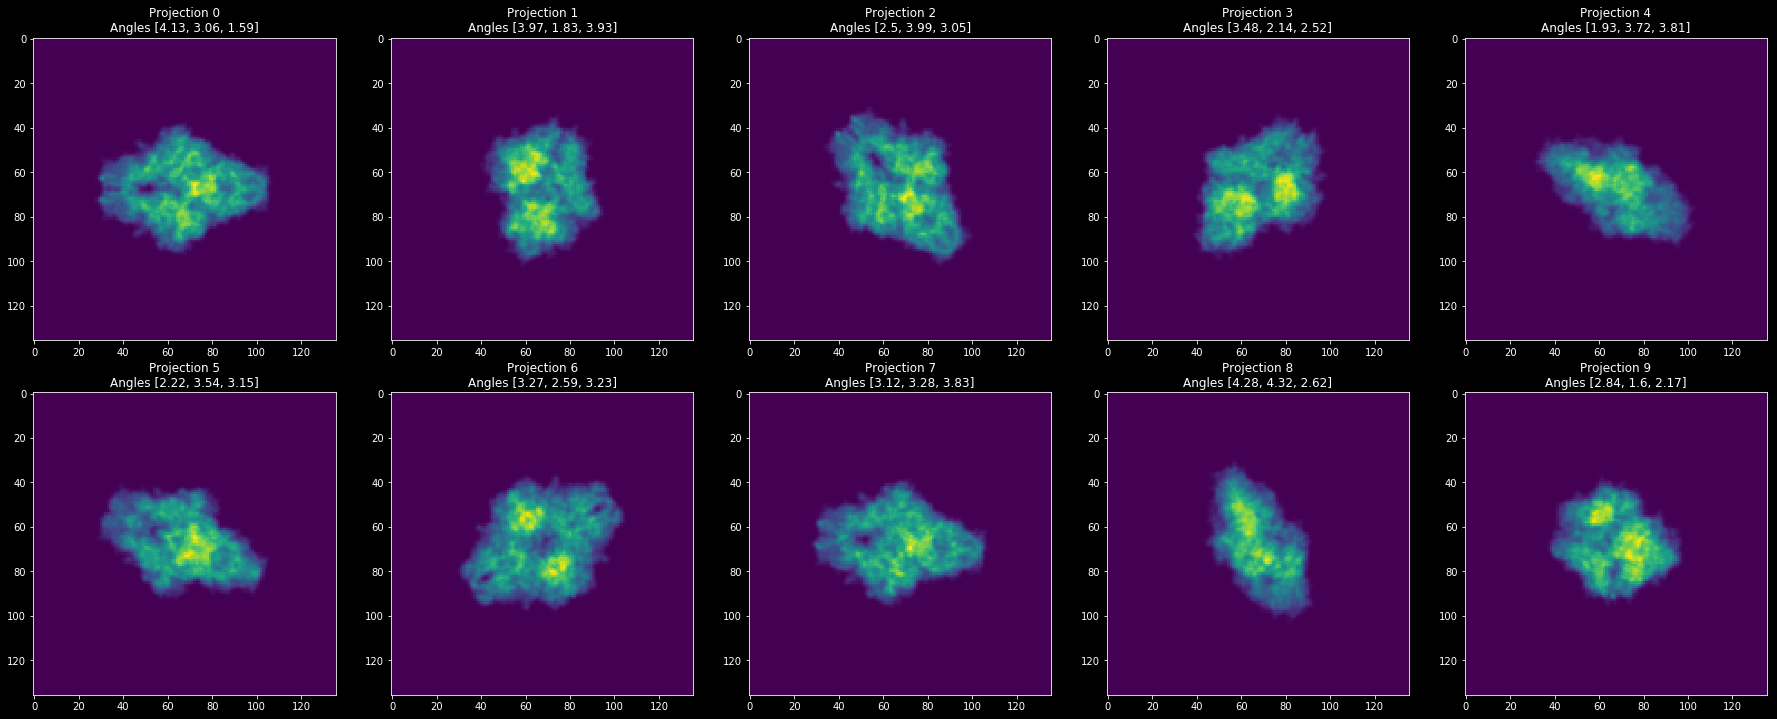

In [10]:
nrows, ncols = 2, 5
start_row, start_col = 0, 0

images = []
titles = []

cr = [(i, j) for i in range(nrows) for j in range(ncols)]

for i, j in cr:
    datapoint = (start_row + i)*(start_col + ncols) + j    

    image = data["Projections"][datapoint]
    image = image + gaussian_noise(shape=image.shape, mean=0, var=0)

    angles = [ float(f"{x:.2f}") for x in data["Angles"][datapoint] ]
    title = f'Projection {datapoint}\nAngles {angles}'
    
    images.append(image)
    titles.append(title)
        
plot_projections(images, titles, nrows=nrows, ncols=ncols)

### Several projections with Gaussian noise

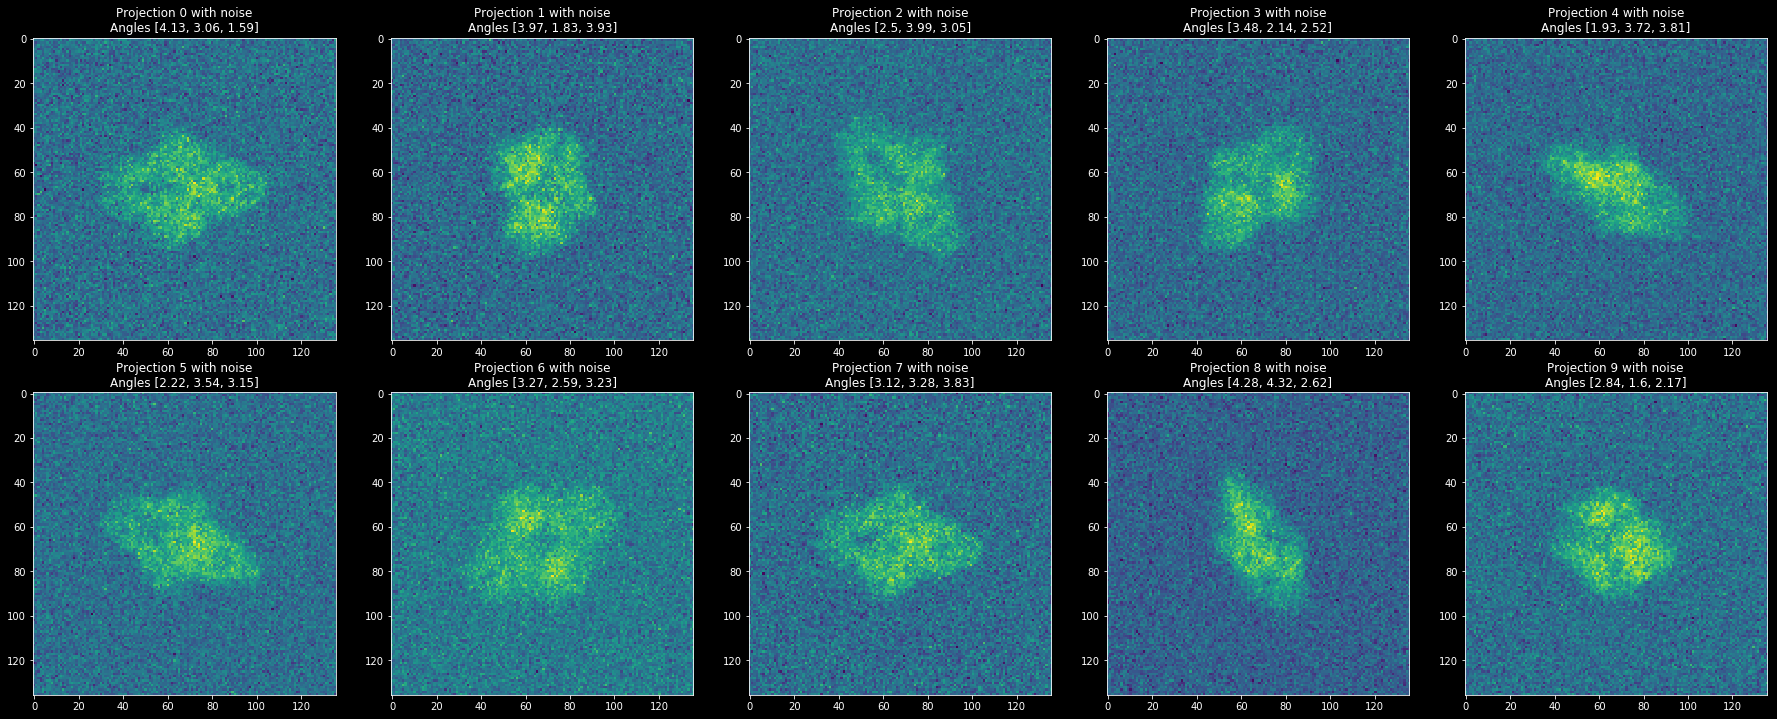

In [11]:
nrows, ncols = 2, 5
start_row, start_col = 0, 0

images = []
titles = []

cr = [(i, j) for i in range(nrows) for j in range(ncols)]

for i, j in cr:
    datapoint = (start_row + i)*(start_col + ncols) + j    

    image = data["Projections"][datapoint]
    image = image + gaussian_noise(shape=image.shape, mean=0, var=10)

    angles = [ float(f"{x:.2f}") for x in data["Angles"][datapoint] ]
    title = f'Projection {datapoint} with noise\nAngles {angles}'
    
    images.append(image)
    titles.append(title)
        
plot_projections(images, titles, nrows=nrows, ncols=ncols)

---

# Library for 3D ploting from 2D

Package [ipyvolume](https://github.com/maartenbreddels/ipyvolume)

In [12]:
import ipyvolume as ipv
import numpy as np

## Angles in Euclidean coordinate system (no rotation)

In [13]:
x = np.array([ ang[0]for ang in data["Angles"]  ]) #x.flatten()
y = np.array([ ang[1]for ang in data["Angles"]  ]) #y.flatten()
z = np.array([ ang[2]for ang in data["Angles"]  ]) #r.flatten()
print("and flattened of shape", x.shape)

and flattened of shape (5000,)


In [14]:
max(x), max(y), max(z), 2*np.pi-np.pi/2

(4.711916156789442, 4.711243666819412, 4.712017283925205, 4.71238898038469)

In [15]:
min(x), min(y), min(z), np.pi/2

(1.5714457049679338,
 1.5719430010132356,
 1.5713180120834784,
 1.5707963267948966)

In [16]:
# draw the scatter plot, and add controls with animate_glyphs
ipv.figure(width=1000, height=700)
s = ipv.scatter(x, z, y, marker="sphere")
#ipv.animation_control(s, interval=200)
#ipv.ylim(-3,3)
ipv.show()

## Camera positions

In [17]:
from cryoem.projections import RotationMatrix

vectors = RotationMatrix(data["Angles"])

(5000, 3)


In [18]:
# draw the scatter plot, and add controls with animate_glyphs
ipv.figure(width=1000, height=700)
s = ipv.scatter(vectors[:,0], vectors[:,2], vectors[:,1], marker="sphere")
#ipv.animation_control(s, interval=200)
#ipv.ylim(-3,3)
ipv.show()